In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})



In [2]:
df: pd.DataFrame = pd.read_csv("data/simple_autoencoder.csv")

<AxesSubplot:xlabel='latent_dim', ylabel='Accuracy'>

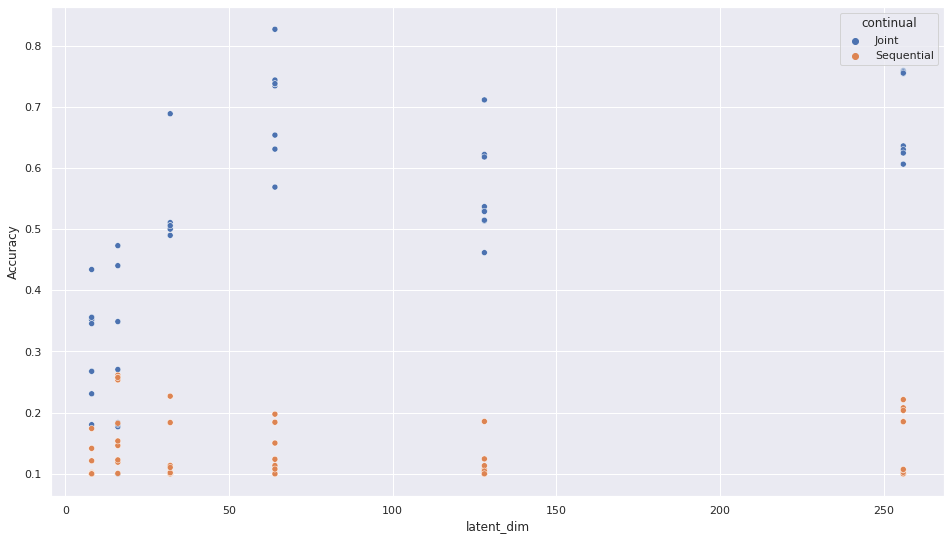

In [3]:
df["continual"] = pd.cut(df["n_experiences"], bins=[0, 1, 5], labels=["Joint", "Sequential"])
sns.scatterplot(data=df, x="latent_dim", y="Accuracy", hue="continual")

In [5]:
from sklearn.decomposition import PCA
import dill
from torch.nn.functional import normalize
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch

transform = transforms.Compose([transforms.ToTensor(), transforms.RandomHorizontalFlip(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = FashionMNIST(root="../datasets", train=True, download=True, transform=transform)
train_dataset = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=len(train_dataset))

images, labels = next(iter(train_dataset))


# dataset = "L128_FMNIST_SSAE.pkl"
# with open(dataset, "rb") as f:
#     dataset = dill.load(f)

In [6]:
images = torch.flatten(images, start_dim=1)
df = pd.DataFrame({"codes":images.tolist(), "class": labels})

In [7]:
# df["codes"] = df["codes"].apply()
pca = PCA(n_components=2)
pca = pca.fit(list(df["codes"]))

# df["codes"]

for i, c in enumerate(list(pca.explained_variance_ratio_)):
    print(f"Component {i} explains {c*100:.2f} of variance")

Component 0 explains 27.91 of variance
Component 1 explains 16.22 of variance


In [8]:
df["dim_1"] = df["codes"].apply(lambda x: pca.transform([x])[0][0])
df["dim_2"] = df["codes"].apply(lambda x: pca.transform([x])[0][1])


Text(0.5, 1.0, 'PCA')

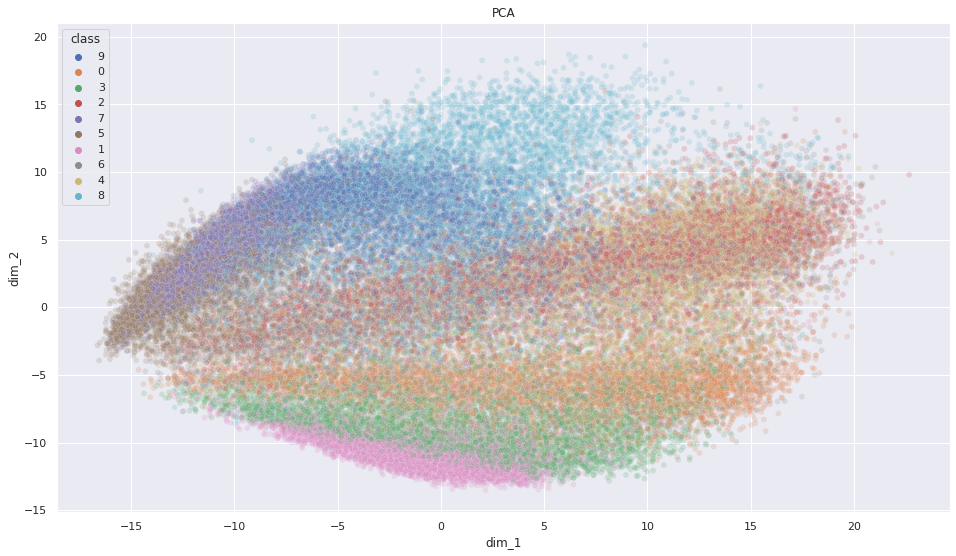

In [9]:
df["class"] = df["class"].apply(lambda x: str(x))
sns.scatterplot(data=df, x="dim_1", y="dim_2", hue="class", alpha=0.2).set_title('PCA')